In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import datetime

In [2]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 코로나 일일 확진자 수 파일(9월 4일까지)
df1 = pd.read_csv('./data_2/daily2.csv', header='infer',encoding = 'euc-kr', na_values=[' '])

In [4]:
# 결측치 제거
df1.dropna(inplace=True)

In [5]:
# 날짜 기준 오름차순 정렬
df1.sort_values(by='date', ascending = True, inplace=True)

In [6]:
# 인덱스 재정렬
df1.reset_index(drop = True, inplace=True)

In [7]:
# 열 이름 변경
df1['confirmed_day'] = df1['confirmed']

In [8]:
df1.drop('confirmed', axis=1, inplace=True)

In [9]:
# 확진자 수 타입 int로 변경
df1['confirmed_day'] = df1['confirmed_day'].astype('int64')

In [10]:
# 전체 데이터 중 전체 지역 합계 데이터만 추출
df1_sum = df1[df1['province']=='합계']

In [11]:
# 인덱스 초기화
df1_sum.reset_index(drop = True, inplace=True)

In [12]:
# 3월 1일 이전 데이터 추가
df1_time= pd.read_csv('./data_2/Time_2.csv', header='infer',encoding = 'utf-8', na_values=[' '])

In [13]:
# 일일 확진자수 열 생성
df1_time['confirmed_day'] = df1_time['confirmed']

In [14]:
# 일일 확진자수 계산
for i in range(df1_time.shape[0]):
    if i == 0:
        df1_time.iloc[0, 7] = df1_time.iloc[0, 4]
    elif i >= 1:
        df1_time.iloc[i, 7] = df1_time.iloc[i, 4] - df1_time.iloc[i-1, 4]

In [15]:
# 정책 데이터프레임
df2 = pd.read_csv('./data_2/Policy.csv', header='infer',encoding = 'latin1', na_values=[' '])

In [16]:
# 정책 아이디를 인덱스로 설정
df2.set_index(['policy_id'], inplace=True)

In [17]:
# 정책 중 Administrative 타입만 추출
df2_ad = df2[df2['type']=='Administrative']

## 바 및 클럽 폐쇄 전

In [18]:
# 데이터 프레임 생성
df1_before_bar_club = df1_time[(df1_time['date'] <= df2.loc[53, 'start_date'])]

In [19]:
# daily2.csv와 concat 할 경우 대비
df1_before_bar_club['province'] = '합계'

In [20]:
# 필요한 열만 추출
df1_before_bar_club = df1_before_bar_club[['province', 'date', 'confirmed_day']]

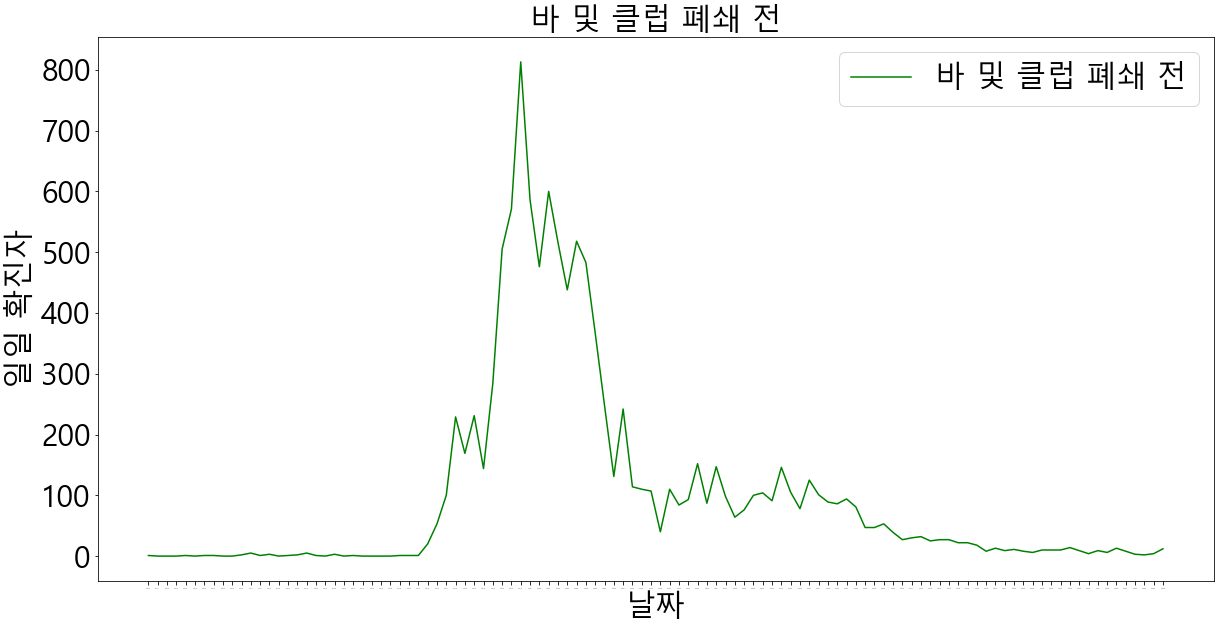

In [21]:
plt.figure(figsize=(20, 10))
plt.plot(df1_before_bar_club['date'], df1_before_bar_club['confirmed_day'],label='바 및 클럽 폐쇄 전', color='green')
plt.xlabel('날짜', fontsize=30)
plt.ylabel('일일 확진자', fontsize=30)
plt.xticks(fontsize=0)
plt.yticks(fontsize=30)
plt.title('바 및 클럽 폐쇄 전', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.show()

## 바 및 클럽 폐쇄 후

In [22]:
# 데이터 프레임 생성
df1_bar_club = df1_time[(df1_time['date'] >= df2.loc[53, 'start_date']) & (df1_time['date'] <= df2.loc[53, 'end_date'])]

In [23]:
df1_bar_club['province'] = '합계'

In [24]:
df1_bar_club = df1_bar_club[['province', 'date', 'confirmed_day']]

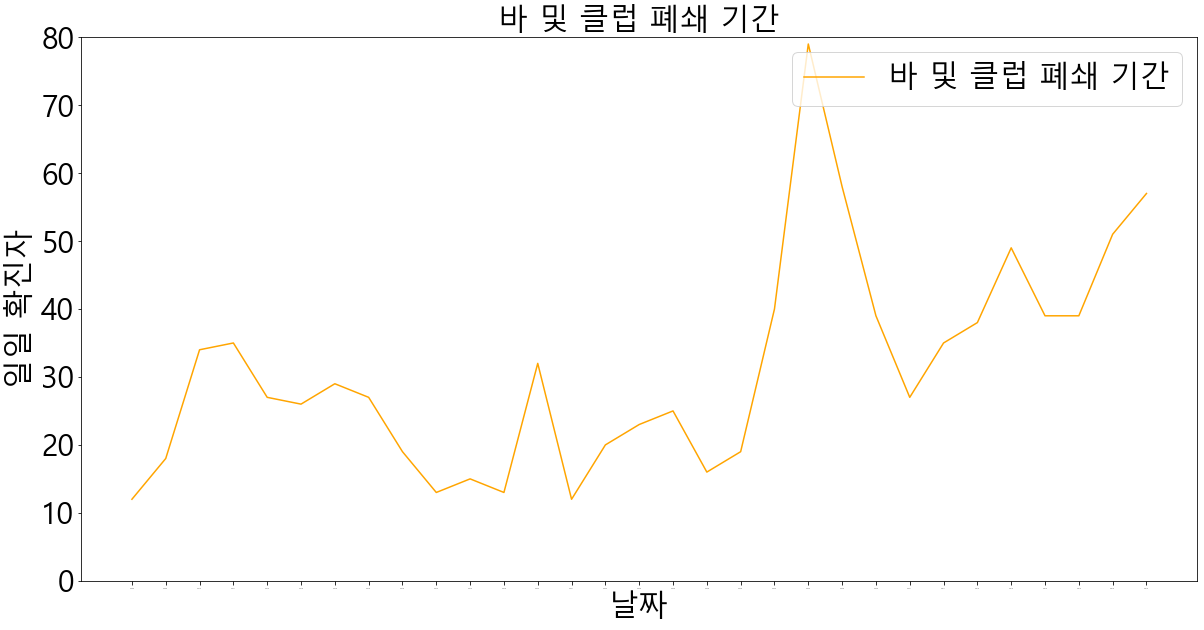

In [25]:
plt.figure(figsize=(20, 10))
plt.plot(df1_bar_club['date'], df1_bar_club['confirmed_day'],label='바 및 클럽 폐쇄 기간', color='orange')
plt.xlabel('날짜', fontsize=30)
plt.ylabel('일일 확진자', fontsize=30)
plt.xticks(fontsize=0)
plt.yticks(fontsize=30)
plt.ylim(0, 80)
plt.title('바 및 클럽 폐쇄 기간', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.show()

#### 바 및 클럽 방문자로 인한 확진자가 나옴에 따라 바 및 클럽을 폐쇄한 것을 볼 수 있다.(폐쇄 전에 비해 오히려 확진자 수 증가)

## 바 및 클럽 개방 후

In [26]:
# 바 및 클럽 폐쇄 정책 끝난 후
df1_after_bar_club_left = df1_time[(df1_time['date'] >= df2.loc[53, 'end_date'])]

In [27]:
# daily2.csv와 concat 할 경우 대비
df1_after_bar_club_left['province'] = '합계'

In [28]:
# 필요한 열만 추출
df1_after_bar_club_left = df1_after_bar_club_left[['province', 'date', 'confirmed_day']]

In [29]:
# 7월 1일부터 9월 4일까지
df1_after_bar_club_right = df1_sum[(df1_sum['date'] >= '2020-07-01')]

In [30]:
# 두 데이터프레임 concat
df1_after_bar_club = pd.concat([df1_after_bar_club_left, df1_after_bar_club_right])

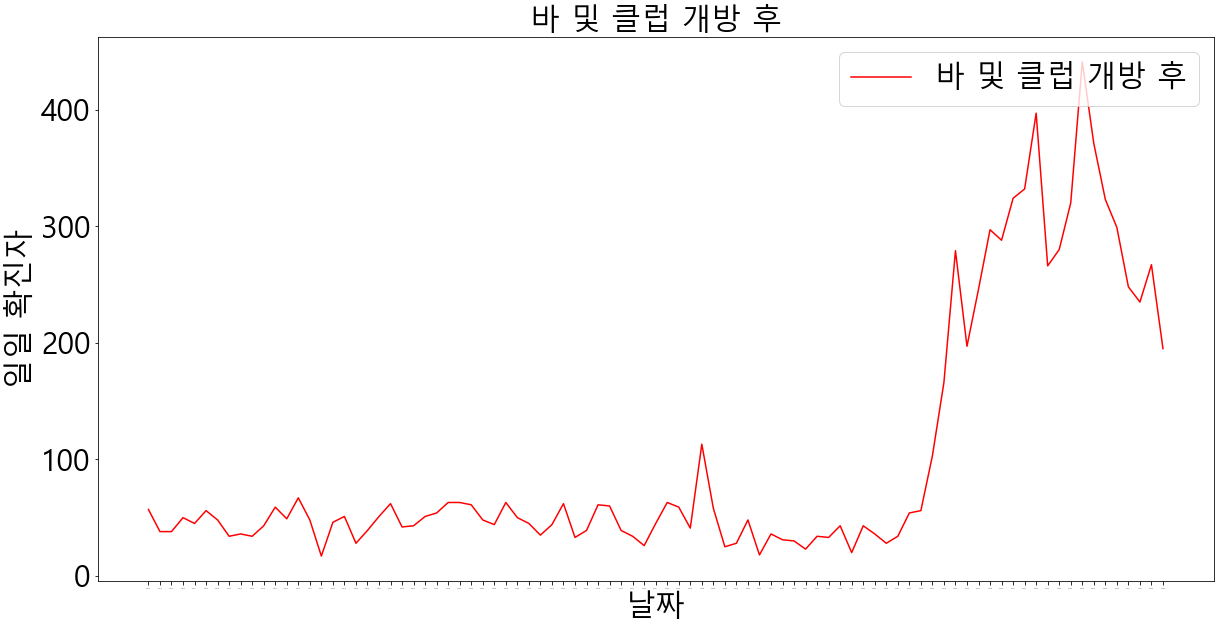

In [31]:
plt.figure(figsize=(20, 10))
plt.plot(df1_after_bar_club['date'], df1_after_bar_club['confirmed_day'],label='바 및 클럽 개방 후', color='red')
plt.xlabel('날짜', fontsize=30)
plt.ylabel('일일 확진자', fontsize=30)
plt.xticks(fontsize=0)
plt.yticks(fontsize=30)
plt.title('바 및 클럽 개방 후', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.show()

#### 시간이 어느정도 경과한 후 바 및 클럽을 개방하였으나 코로나 확진자 수가 급증(8월 중순)한 이후로 수도권에선 다시 바 및 클럽을 폐쇄하였다.

## 바 및 클럽 폐쇄 전후

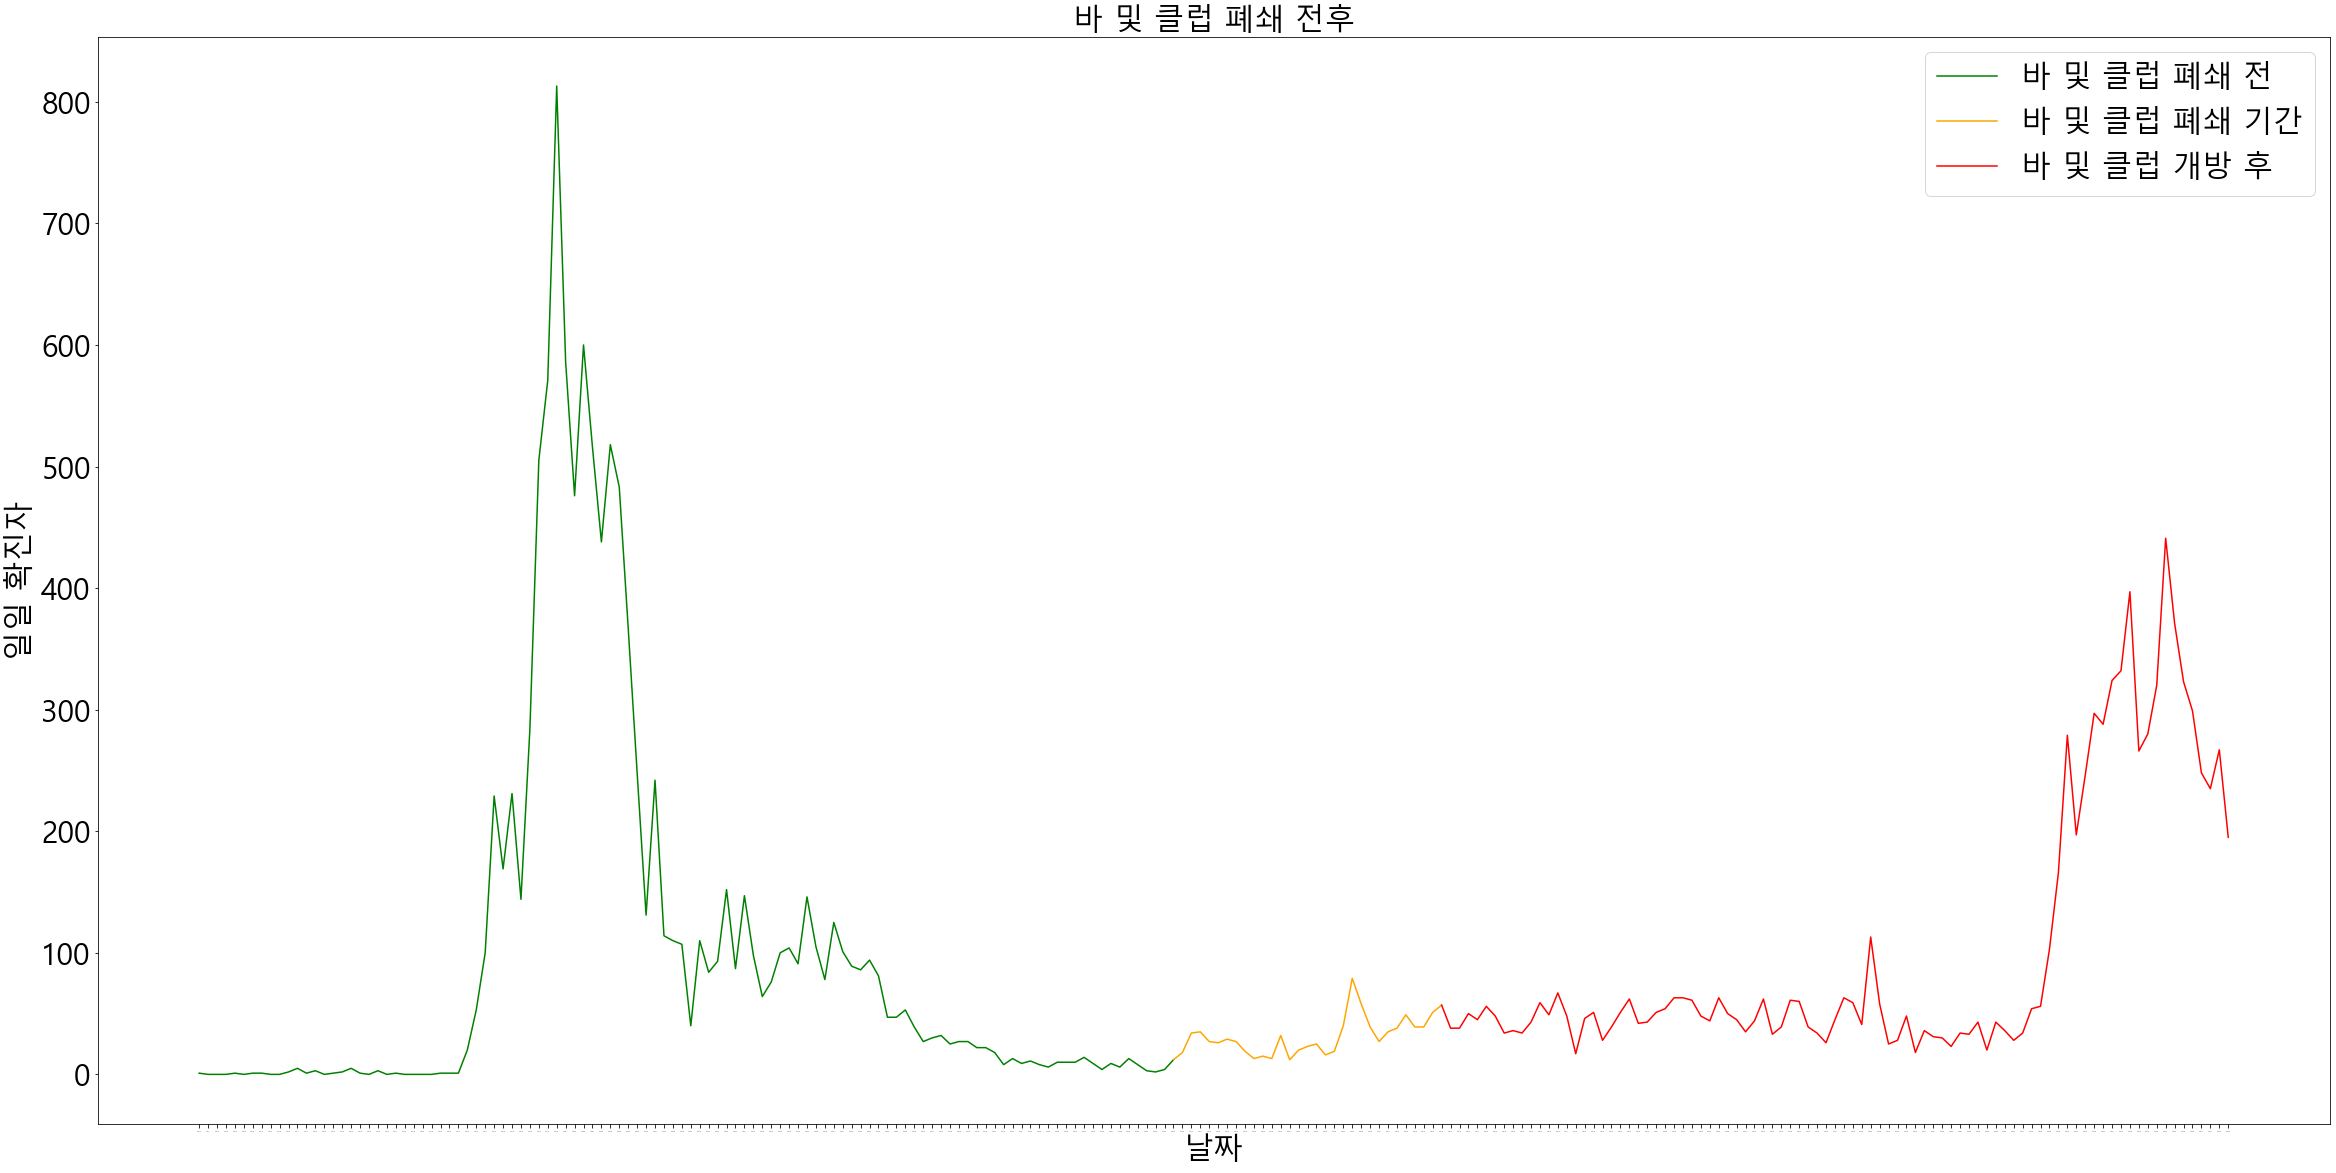

In [32]:
plt.figure(figsize=(40, 20))
plt.plot(df1_before_bar_club['date'], df1_before_bar_club['confirmed_day'],label='바 및 클럽 폐쇄 전', color='green')
plt.plot(df1_bar_club['date'], df1_bar_club['confirmed_day'],label='바 및 클럽 폐쇄 기간', color='orange')
plt.plot(df1_after_bar_club['date'], df1_after_bar_club['confirmed_day'],label='바 및 클럽 개방 후', color='red')

plt.xlabel('날짜', fontsize=30)
plt.ylabel('일일 확진자', fontsize=30)
plt.xticks(fontsize=0)
plt.yticks(fontsize=30)
plt.title('바 및 클럽 폐쇄 전후', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.show()

#### 바 및 클럽 폐쇄 여부가 코로나 확진자 수 변화에는 큰 영향을 미치지 않음을 알 수 있다.

## 노래방 폐쇄 전

In [33]:
# 데이터 프레임 생성
df1_before_karaoke = df1_time[(df1_time['date'] <= df2.loc[55, 'start_date'])]

In [34]:
df1_before_karaoke['province'] = '합계'

In [35]:
df1_before_karaoke = df1_before_karaoke[['province', 'date', 'confirmed_day']]

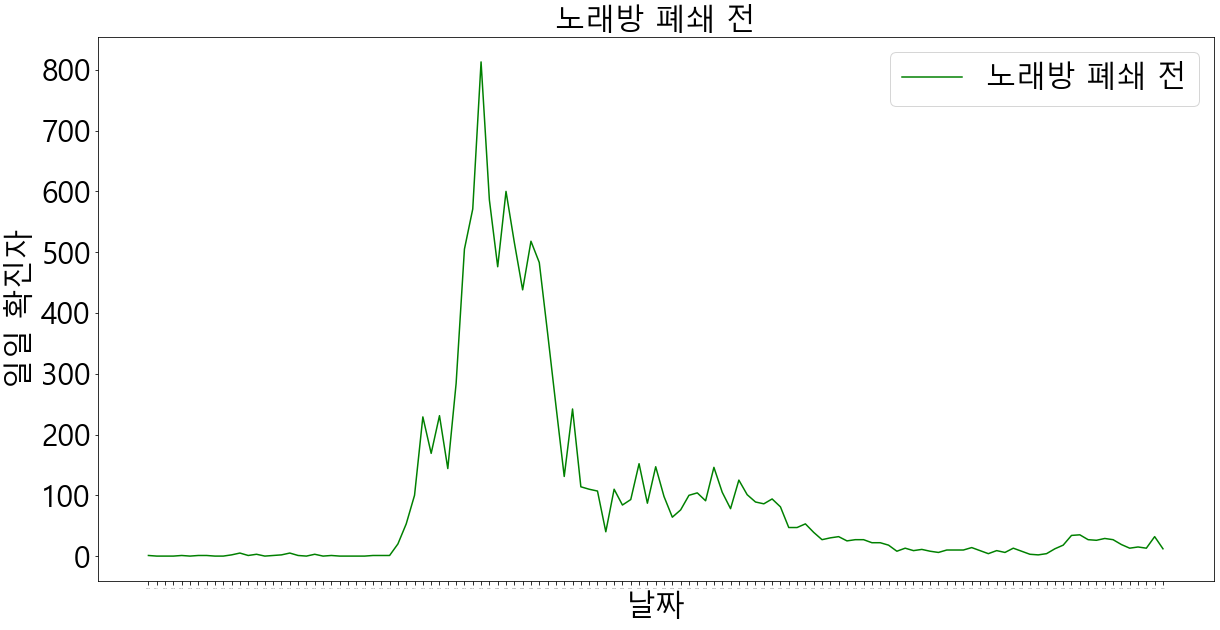

In [36]:
plt.figure(figsize=(20, 10))
plt.plot(df1_before_karaoke['date'], df1_before_karaoke['confirmed_day'],label='노래방 폐쇄 전', color='green')
plt.xlabel('날짜', fontsize=30)
plt.ylabel('일일 확진자', fontsize=30)
plt.xticks(fontsize=0)
plt.yticks(fontsize=30)
plt.title('노래방 폐쇄 전', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.show()

## 노래방 폐쇄 후

In [37]:
# 데이터 프레임 생성
df1_karaoke = df1_time[(df1_time['date'] >= df2.loc[55, 'start_date']) & (df1_time['date'] <= df2.loc[55, 'end_date'])]

In [38]:
df1_karaoke['province'] = '합계'

In [39]:
df1_karaoke = df1_karaoke[['province', 'date', 'confirmed_day']]

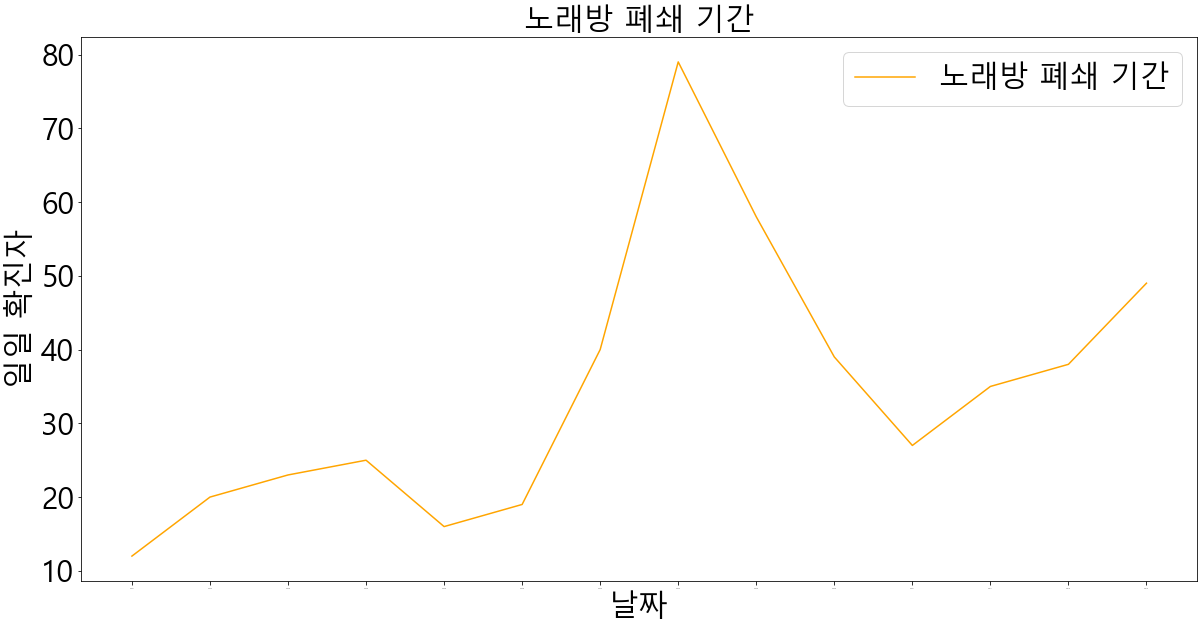

In [40]:
plt.figure(figsize=(20, 10))
plt.plot(df1_karaoke['date'], df1_karaoke['confirmed_day'],label='노래방 폐쇄 기간', color='orange')
plt.xlabel('날짜', fontsize=30)
plt.ylabel('일일 확진자', fontsize=30)
plt.xticks(fontsize=0)
plt.yticks(fontsize=30)
plt.title('노래방 폐쇄 기간', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.show()

#### 노래방 방문자로 인한 확진자가 나옴에 따라 노래방을 폐쇄한 것을 볼 수 있다.(폐쇄 전에 비해 오히려 확진자 수 증가)

## 노래방 개방 후

In [41]:
# 노래방 폐쇄 정책 끝난 후
df1_after_karaoke_left = df1_time[(df1_time['date'] >= df2.loc[55, 'end_date'])]

In [42]:
# daily2.csv와 concat 할 경우 대비
df1_after_karaoke_left['province'] = '합계'

In [43]:
# 필요한 열만 추출
df1_after_karaoke_left = df1_after_karaoke_left[['province', 'date', 'confirmed_day']]

In [44]:
# 7월 1일부터 9월 4일까지
df1_after_karaoke_right = df1_sum[(df1_sum['date'] >= '2020-07-01')]

In [45]:
# 두 데이터프레임 concat
df1_after_karaoke = pd.concat([df1_after_karaoke_left, df1_after_karaoke_right])

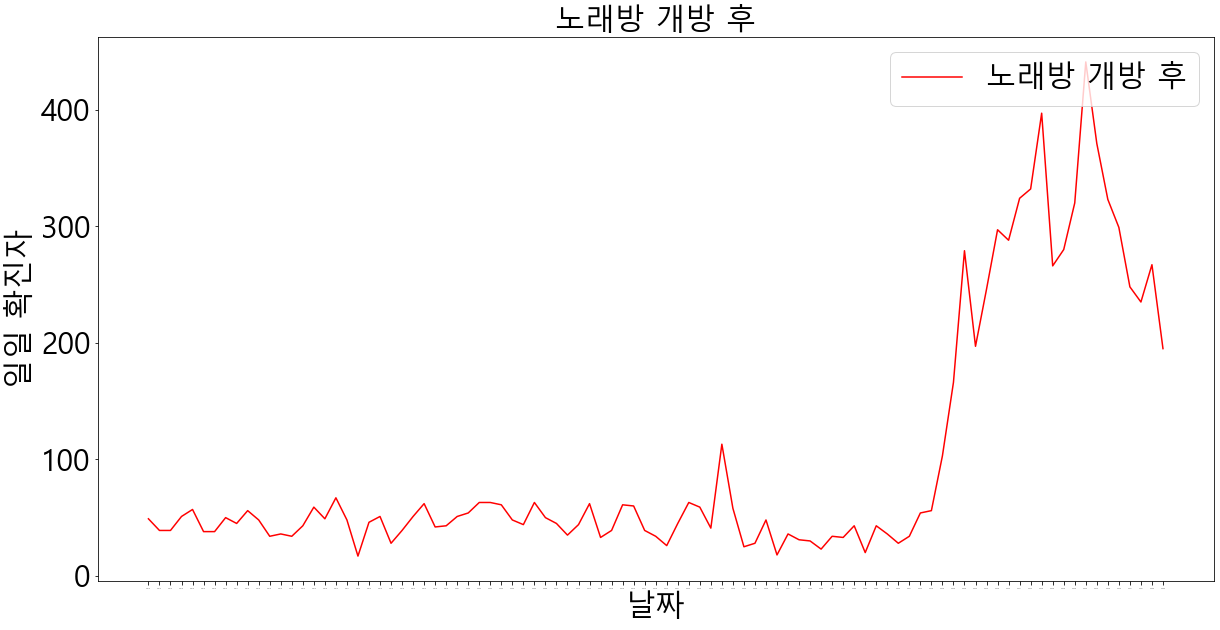

In [46]:
plt.figure(figsize=(20, 10))
plt.plot(df1_after_karaoke['date'], df1_after_karaoke['confirmed_day'],label='노래방 개방 후', color='red')
plt.xlabel('날짜', fontsize=30)
plt.ylabel('일일 확진자', fontsize=30)
plt.xticks(fontsize=0)
plt.yticks(fontsize=30)
plt.title('노래방 개방 후', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.show()

#### 시간이 어느정도 경과한 후 노래방을 개방하였으나 코로나 확진자 수가 급증(8월 중순)한 이후로 수도권에선 다시 노래방을 폐쇄하였다.

## 노래방 폐쇄 전후

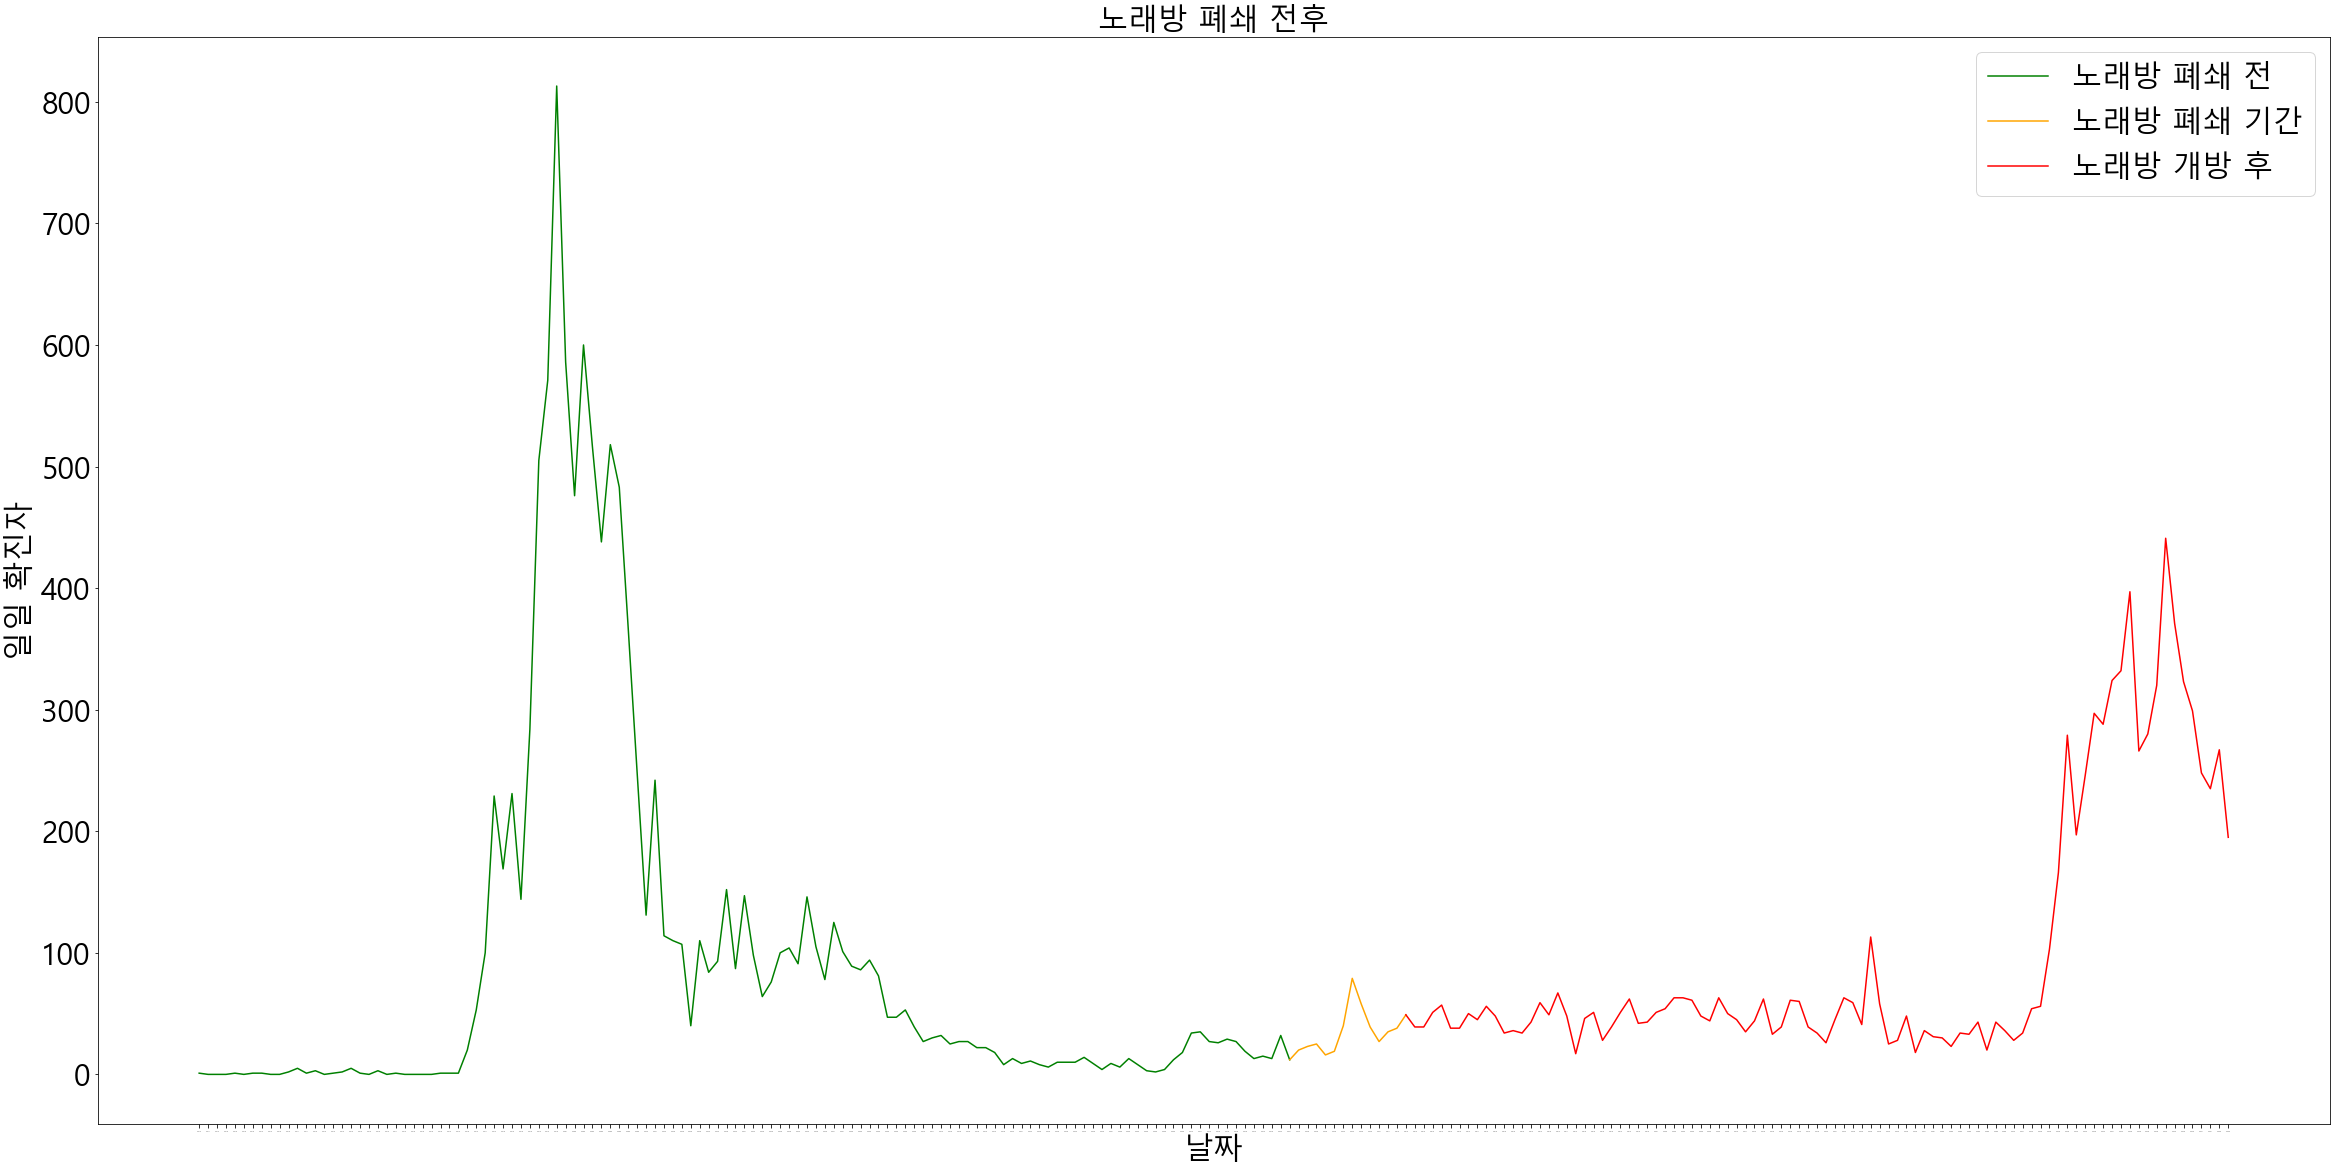

In [47]:
plt.figure(figsize=(40, 20))
plt.plot(df1_before_karaoke['date'], df1_before_karaoke['confirmed_day'],label='노래방 폐쇄 전', color='green')
plt.plot(df1_karaoke['date'], df1_karaoke['confirmed_day'],label='노래방 폐쇄 기간', color='orange')
plt.plot(df1_after_karaoke['date'], df1_after_karaoke['confirmed_day'],label='노래방 개방 후', color='red')

plt.xlabel('날짜', fontsize=30)
plt.ylabel('일일 확진자', fontsize=30)
plt.xticks(fontsize=0)
plt.yticks(fontsize=30)
plt.title('노래방 폐쇄 전후', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.show()

#### 노래방 폐쇄 여부가 코로나 확진자 수 변화에는 큰 영향을 미치지 않음을 알 수 있다.